In [1]:
import csv

filePath = "/Dataset/diabetic_data.csv"

reader = csv.reader(open(filePath))
attributes = next(reader)
print(attributes)

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


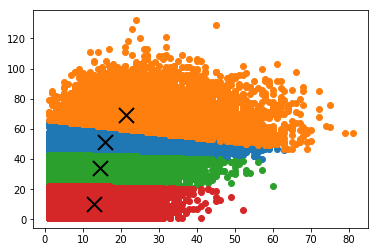

In [9]:
from matplotlib import pyplot
import numpy as np
import pandas as pd
from sklearn import cluster

filePath = "C:/Chang/NEU/courses/cs6220 datamining/project/dataset_diabetes/diabetic_data.csv"
# Read dataset using pandas
ds = pd.read_csv(filePath, sep=',',header=0)

# Extract columns using column names
column_a = ds["num_medications"]
column_b = ds["num_lab_procedures"]

# Combine column data
data = np.array([[x, y] for [x, y] in zip(column_a, column_b)], np.int32)

# K means
k = 4
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(k):
    # select only data observations with cluster label == i
    ds = data[np.where(labels==i)]
    # plot the data observations
    pyplot.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()